In [3]:
import os
import zipfile


# unzip files 

In [4]:
local_zip='datasets/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('datasets/validation-horse-or-human')
zip_ref.close()

In [6]:
train_horse_dir=os.path.join('datasets/horse-or-human/horses/')
train_human_dir=os.path.join('datasets/horse-or-human/humans/')
validation_horse_dir=os.path.join('datasets/validation-horse-or-human/horses/')
validation_human_dir=os.path.join('datasets/validation-horse-or-human/humans/')

In [8]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
validation_horse_names=os.listdir(validation_horse_dir)
validation_human_names=os.listdir(validation_human_dir)

# take a look at few pictures

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index=0

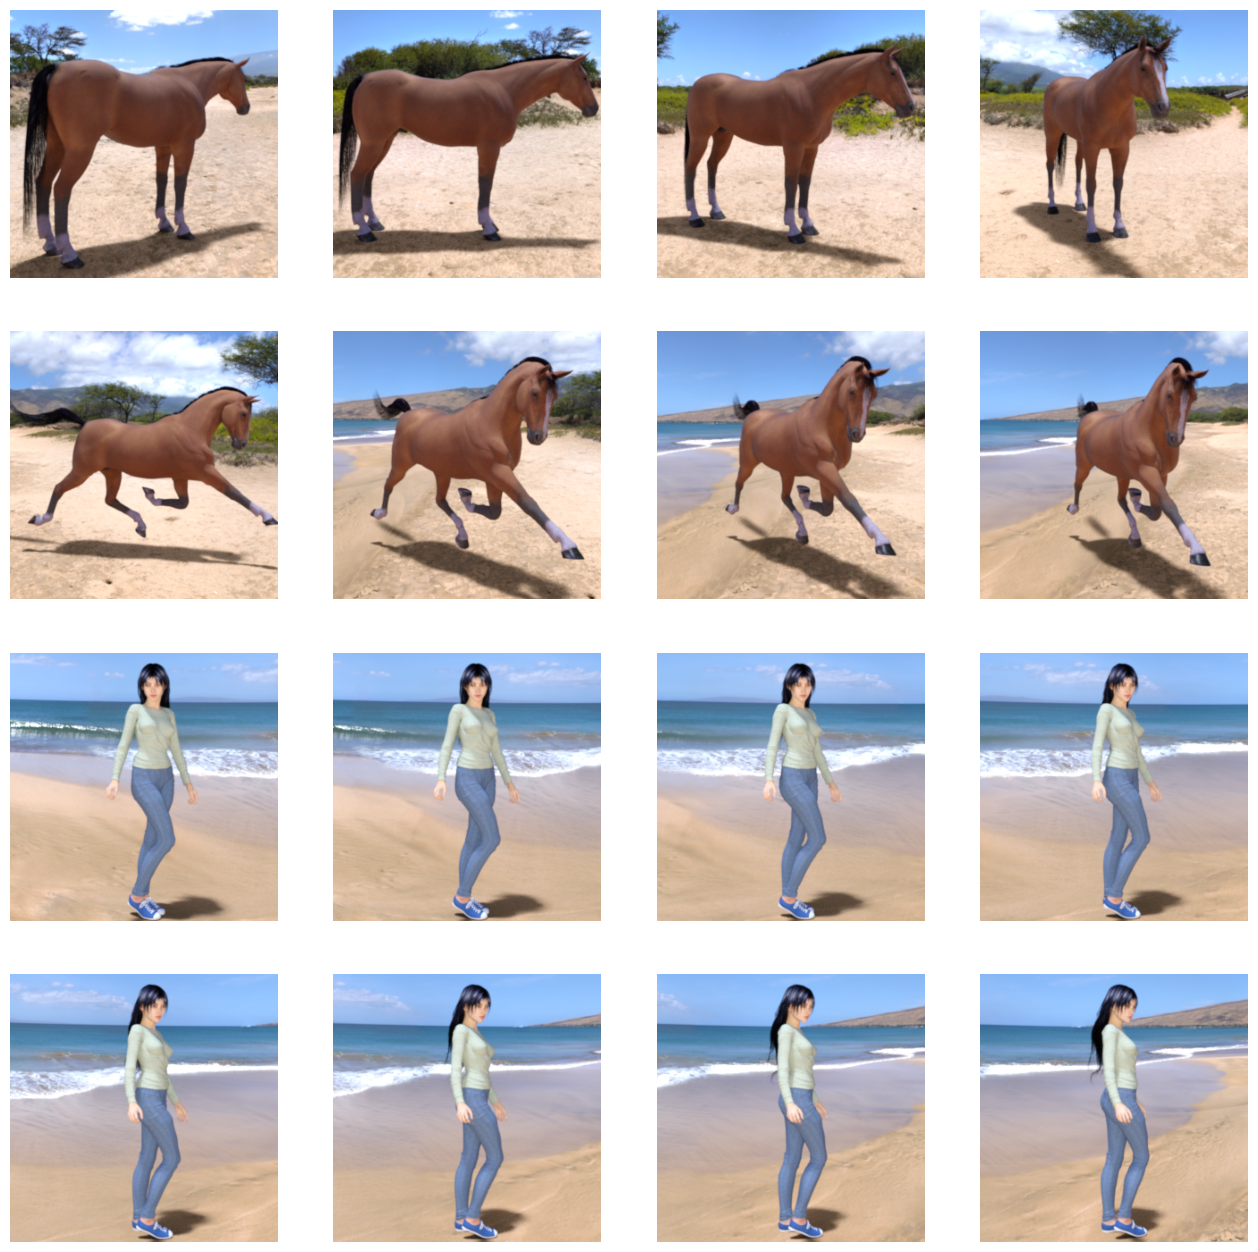

In [13]:
fig=plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index+=8

next_horse_pix=[os.path.join(train_horse_dir,fname)
                    for fname in train_horse_names[pic_index-8:pic_index]
                ]
next_human_pix=[
                os.path.join(train_human_dir,fname)
                    for fname in train_human_names[pic_index-8:pic_index]
                ]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    plt.imshow(img)

# Building a small model form scratch

In [14]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

# Data Preprocessing

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

train_generator= train_datagen.flow_from_directory(
    'datasets/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)
validation_generator=validation_datagen.flow_from_directory(
    'datasets/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# training

In [21]:
history=model.fit(
    
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 9s 809ms/step - loss: 0.8516 - accuracy: 0.5128 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 5s 623ms/step - loss: 0.8864 - accuracy: 0.6207 - val_loss: 0.7273 - val_accuracy: 0.5312
Epoch 3/15
8/8 [==============================] - 5s 709ms/step - loss: 0.6526 - accuracy: 0.7219 - val_loss: 0.4556 - val_accuracy: 0.8633
Epoch 4/15
8/8 [==============================] - 5s 627ms/step - loss: 0.3929 - accuracy: 0.8610 - val_loss: 1.7120 - val_accuracy: 0.6133
Epoch 5/15
8/8 [==============================] - 5s 683ms/step - loss: 0.4450 - accuracy: 0.8174 - val_loss: 3.4695 - val_accuracy: 0.6094
Epoch 6/15
8/8 [==============================] - 5s 639ms/step - loss: 0.4890 - accuracy: 0.8710 - val_loss: 1.0190 - val_accuracy: 0.8281
Epoch 7/15
8/8 [==============================] - 5s 623ms/step - loss: 0.1908 - accuracy: 0.9255 - val_loss: 1.2876 - val_accuracy: 0.8047
Epoch 8/15
8/8 [====

# Model Prediction

In [23]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

image_directory='datasets/test/'
image_files=os.listdir(image_directory)
images=[]
for image_file in image_files:
    image_path=os.path.join(image_directory,image_file)
    image=load_img(image_path,target_size=(300,300))
    image_array=img_to_array(image)
    image_array/=255.0
    x=np.expand_dims(image_array,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(image_file + 'is a human')
    else:
        print(image_file + 'is a horse')

1/1 [==============================] - 0s 491ms/step
[8.378385e-06]
horse1.jpgis a horse
1/1 [==============================] - 0s 16ms/step
[8.459598e-11]
horse2.jpgis a horse
1/1 [==============================] - 0s 16ms/step
[0.314574]
horse3.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[0.3001221]
horse4.jpgis a horse
1/1 [==============================] - 0s 16ms/step
[2.4495378e-14]
horse5.jpgis a horse
1/1 [==============================] - 0s 15ms/step
[0.99995875]
human1.jpgis a human
1/1 [==============================] - 0s 16ms/step
[0.08343101]
human2.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[0.9699811]
human3.jpgis a human
1/1 [==============================] - 0s 16ms/step
[0.9739952]
human4.jpgis a human


# Visualizing intermediate representations 

1/1 [==============================] - 0s 81ms/step


C:\Users\Anonymous\AppData\Local\Temp\ipykernel_8304\846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Anonymous\AppData\Local\Temp\ipykernel_8304\846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


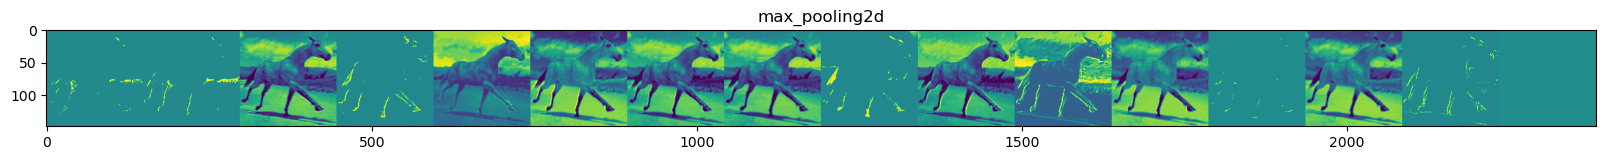

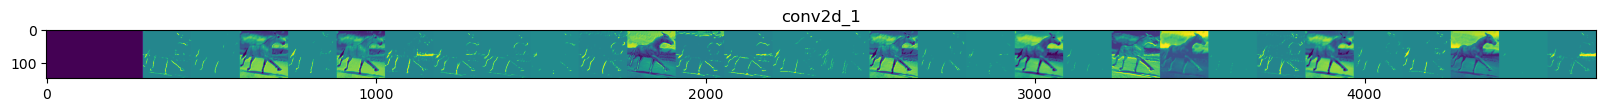

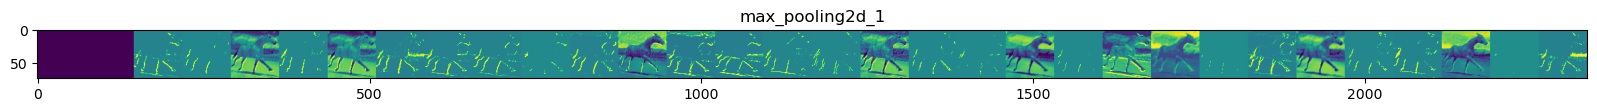

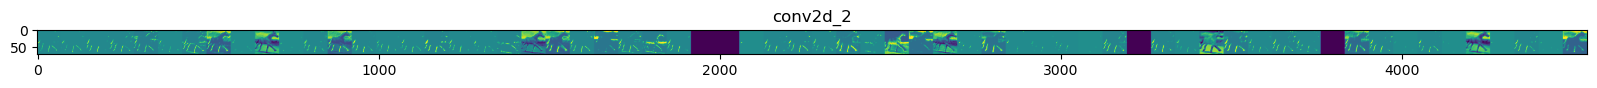

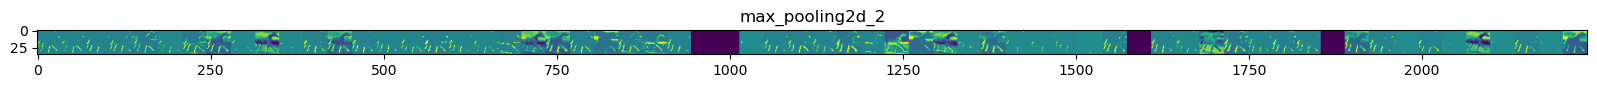

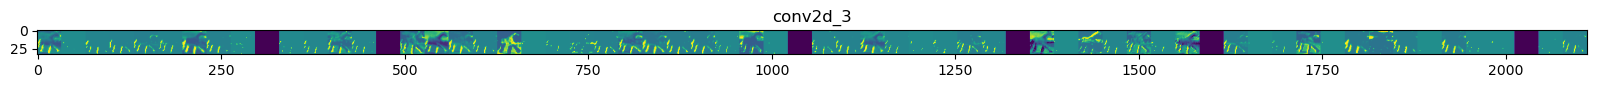

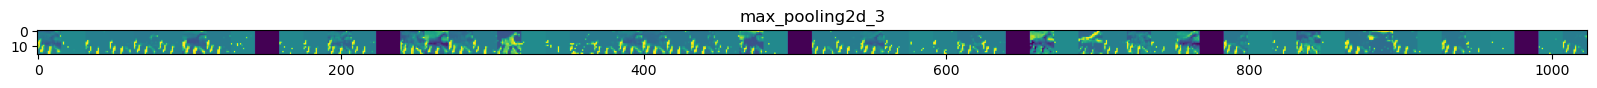

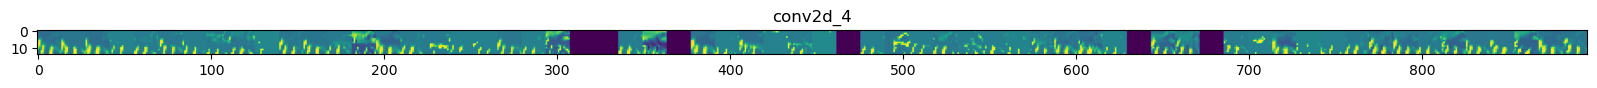

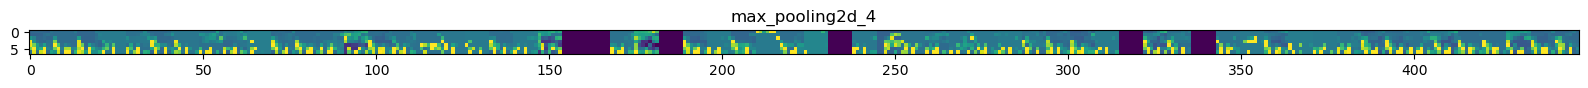

In [24]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')